In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
data = np.loadtxt('datasets/airfoil_self_noise.dat')

In [3]:
### Creating features and labels for train and test set
### 10% of total data used as test data

x_train1 = np.empty([int(data.shape[0]*0.9),data.shape[1]-1])
y_train1 = np.empty([int(data.shape[0]*0.9),1])
x_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),data.shape[1]-1])
y_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),1])

for i in range(0,data.shape[0]):
    if(i<int(data.shape[0]*0.9)):
        x_train1[i,0] = data[i][0]
        x_train1[i,1] = data[i][1]
        x_train1[i,2] = data[i][2]
        x_train1[i,3] = data[i][3]
        x_train1[i,4] = data[i][4]
        y_train1[i,0] = data[i][5]
    else:
        x_test1[i-int(data.shape[0]*0.9),0] = data[i][0]
        x_test1[i-int(data.shape[0]*0.9),1] = data[i][1]
        x_test1[i-int(data.shape[0]*0.9),2] = data[i][2]
        x_test1[i-int(data.shape[0]*0.9),3] = data[i][3]
        x_test1[i-int(data.shape[0]*0.9),4] = data[i][4]
        y_test1[i-int(data.shape[0]*0.9),0] = data[i][5]
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(1352, 5) (151, 5) (1352, 1) (151, 1)


In [4]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = []
v = []
for i in range(0,x_train1.shape[1]):
    mean = np.mean(x_train1[:,i])
    var = np.var(x_train1[:,i])
    m.append(mean)
    v.append(var)
    x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
    x_train[:,i] = x_train[:,i]/var

y_test = y_test1
m1 = np.mean(y_train1)
v1 = np.var(x_train1)
y_train = np.empty(y_train1.shape)
y_train = y_train1 - m1*np.ones(y_train1.shape)
y_train = y_train/v1
# y_train = y_train1


In [5]:
# Training
epochs = 10000  ## Number of epochs
w = np.zeros([x_train.shape[1],1])
batch_size = 1000    ## Batch size
batch = int(x_train.shape[0]/batch_size)
lr = 1e-5   ### Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = x_train[b:b+batch_size]@w 
        w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_pred.shape[0] 
    y_pred = (x_train@w)
    l1 = np.mean((y_train-y_pred)**2)
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 3.445229042749951e-12
Epoch 1 Loss 3.4039704258236396e-12
Epoch 2 Loss 3.3697933071680134e-12
Epoch 3 Loss 3.34142041038858e-12
Epoch 4 Loss 3.3178088248204753e-12
Epoch 5 Loss 3.2981065991943023e-12
Epoch 6 Loss 3.2816174150616915e-12
Epoch 7 Loss 3.267771831945384e-12
Epoch 8 Loss 3.256103878045792e-12
Epoch 9 Loss 3.246231989479519e-12
Epoch 10 Loss 3.2378434873111018e-12
Epoch 11 Loss 3.230681933086772e-12
Epoch 12 Loss 3.2245368267067572e-12
Epoch 13 Loss 3.2192352105790503e-12
Epoch 14 Loss 3.2146348253896925e-12
Epoch 15 Loss 3.210618529003117e-12
Epoch 16 Loss 3.2070897438170274e-12
Epoch 17 Loss 3.203968741652556e-12
Epoch 18 Loss 3.201189610842722e-12
Epoch 19 Loss 3.198697779118862e-12
Epoch 20 Loss 3.1964479894283283e-12
Epoch 21 Loss 3.1944026449575204e-12
Epoch 22 Loss 3.1925304552032122e-12
Epoch 23 Loss 3.1908053275998654e-12
Epoch 24 Loss 3.189205459513709e-12
Epoch 25 Loss 3.187712593797094e-12
Epoch 26 Loss 3.186311407917647e-12
Epoch 27 Loss 3.184989012

Epoch 473 Loss 2.9498922070554986e-12
Epoch 474 Loss 2.9495787354608388e-12
Epoch 475 Loss 2.949265925166792e-12
Epoch 476 Loss 2.9489537748340328e-12
Epoch 477 Loss 2.9486422831258988e-12
Epoch 478 Loss 2.9483314487083848e-12
Epoch 479 Loss 2.948021270250137e-12
Epoch 480 Loss 2.9477117464224503e-12
Epoch 481 Loss 2.947402875899256e-12
Epoch 482 Loss 2.9470946573571253e-12
Epoch 483 Loss 2.946787089475259e-12
Epoch 484 Loss 2.9464801709354823e-12
Epoch 485 Loss 2.9461739004222434e-12
Epoch 486 Loss 2.945868276622603e-12
Epoch 487 Loss 2.945563298226235e-12
Epoch 488 Loss 2.9452589639254145e-12
Epoch 489 Loss 2.94495527241502e-12
Epoch 490 Loss 2.9446522223925224e-12
Epoch 491 Loss 2.944349812557983e-12
Epoch 492 Loss 2.944048041614049e-12
Epoch 493 Loss 2.943746908265944e-12
Epoch 494 Loss 2.9434464112214683e-12
Epoch 495 Loss 2.9431465491909904e-12
Epoch 496 Loss 2.942847320887443e-12
Epoch 497 Loss 2.9425487250263206e-12
Epoch 498 Loss 2.942250760325667e-12
Epoch 499 Loss 2.94195342

Epoch 855 Loss 2.8679414609789276e-12
Epoch 856 Loss 2.8678037043045094e-12
Epoch 857 Loss 2.8676662504970377e-12
Epoch 858 Loss 2.8675290989320366e-12
Epoch 859 Loss 2.867392248986285e-12
Epoch 860 Loss 2.8672557000378067e-12
Epoch 861 Loss 2.867119451465877e-12
Epoch 862 Loss 2.86698350265101e-12
Epoch 863 Loss 2.866847852974965e-12
Epoch 864 Loss 2.8667125018207415e-12
Epoch 865 Loss 2.8665774485725737e-12
Epoch 866 Loss 2.8664426926159307e-12
Epoch 867 Loss 2.866308233337514e-12
Epoch 868 Loss 2.8661740701252542e-12
Epoch 869 Loss 2.8660402023683105e-12
Epoch 870 Loss 2.8659066294570643e-12
Epoch 871 Loss 2.8657733507831225e-12
Epoch 872 Loss 2.8656403657393076e-12
Epoch 873 Loss 2.8655076737196644e-12
Epoch 874 Loss 2.8653752741194482e-12
Epoch 875 Loss 2.865243166335131e-12
Epoch 876 Loss 2.8651113497643917e-12
Epoch 877 Loss 2.8649798238061187e-12
Epoch 878 Loss 2.8648485878604066e-12
Epoch 879 Loss 2.864717641328551e-12
Epoch 880 Loss 2.8645869836130495e-12
Epoch 881 Loss 2.864

Epoch 1353 Loss 2.826679902474902e-12
Epoch 1354 Loss 2.826636079650272e-12
Epoch 1355 Loss 2.8265923632201586e-12
Epoch 1356 Loss 2.8265487529564683e-12
Epoch 1357 Loss 2.8265052486315754e-12
Epoch 1358 Loss 2.826461850018318e-12
Epoch 1359 Loss 2.826418556889997e-12
Epoch 1360 Loss 2.8263753690203756e-12
Epoch 1361 Loss 2.8263322861836796e-12
Epoch 1362 Loss 2.8262893081545957e-12
Epoch 1363 Loss 2.826246434708268e-12
Epoch 1364 Loss 2.8262036656203013e-12
Epoch 1365 Loss 2.826161000666758e-12
Epoch 1366 Loss 2.826118439624157e-12
Epoch 1367 Loss 2.8260759822694738e-12
Epoch 1368 Loss 2.826033628380138e-12
Epoch 1369 Loss 2.8259913777340356e-12
Epoch 1370 Loss 2.825949230109504e-12
Epoch 1371 Loss 2.825907185285333e-12
Epoch 1372 Loss 2.825865243040764e-12
Epoch 1373 Loss 2.8258234031554906e-12
Epoch 1374 Loss 2.825781665409654e-12
Epoch 1375 Loss 2.825740029583846e-12
Epoch 1376 Loss 2.8256984954591047e-12
Epoch 1377 Loss 2.825657062816917e-12
Epoch 1378 Loss 2.8256157314392135e-12


Epoch 1789 Loss 2.8151203053694523e-12
Epoch 1790 Loss 2.8151064506346298e-12
Epoch 1791 Loss 2.815092636551866e-12
Epoch 1792 Loss 2.8150788630284952e-12
Epoch 1793 Loss 2.815065129972048e-12
Epoch 1794 Loss 2.8150514372902453e-12
Epoch 1795 Loss 2.8150377848910025e-12
Epoch 1796 Loss 2.815024172682429e-12
Epoch 1797 Loss 2.8150106005728243e-12
Epoch 1798 Loss 2.8149970684706825e-12
Epoch 1799 Loss 2.8149835762846856e-12
Epoch 1800 Loss 2.81497012392371e-12
Epoch 1801 Loss 2.814956711296822e-12
Epoch 1802 Loss 2.8149433383132777e-12
Epoch 1803 Loss 2.8149300048825236e-12
Epoch 1804 Loss 2.8149167109141974e-12
Epoch 1805 Loss 2.814903456318122e-12
Epoch 1806 Loss 2.8148902410043144e-12
Epoch 1807 Loss 2.814877064882976e-12
Epoch 1808 Loss 2.814863927864498e-12
Epoch 1809 Loss 2.814850829859459e-12
Epoch 1810 Loss 2.814837770778626e-12
Epoch 1811 Loss 2.8148247505329513e-12
Epoch 1812 Loss 2.814811769033576e-12
Epoch 1813 Loss 2.814798826191824e-12
Epoch 1814 Loss 2.814785921919209e-12


Epoch 2232 Loss 2.8118886045791524e-12
Epoch 2233 Loss 2.8118859519449162e-12
Epoch 2234 Loss 2.811883313309176e-12
Epoch 2235 Loss 2.8118806886359782e-12
Epoch 2236 Loss 2.8118780778894497e-12
Epoch 2237 Loss 2.8118754810337952e-12
Epoch 2238 Loss 2.8118728980332968e-12
Epoch 2239 Loss 2.8118703288523162e-12
Epoch 2240 Loss 2.8118677734552916e-12
Epoch 2241 Loss 2.811865231806741e-12
Epoch 2242 Loss 2.8118627038712582e-12
Epoch 2243 Loss 2.8118601896135153e-12
Epoch 2244 Loss 2.811857688998261e-12
Epoch 2245 Loss 2.8118552019903235e-12
Epoch 2246 Loss 2.8118527285546047e-12
Epoch 2247 Loss 2.811850268656084e-12
Epoch 2248 Loss 2.8118478222598204e-12
Epoch 2249 Loss 2.8118453893309475e-12
Epoch 2250 Loss 2.811842969834674e-12
Epoch 2251 Loss 2.8118405637362866e-12
Epoch 2252 Loss 2.8118381710011472e-12
Epoch 2253 Loss 2.811835791594695e-12
Epoch 2254 Loss 2.811833425482443e-12
Epoch 2255 Loss 2.811831072629982e-12
Epoch 2256 Loss 2.811828733002975e-12
Epoch 2257 Loss 2.811826406567164e

Epoch 2696 Loss 2.811692074488089e-12
Epoch 2697 Loss 2.811693096664916e-12
Epoch 2698 Loss 2.811694122447848e-12
Epoch 2699 Loss 2.8116951518243677e-12
Epoch 2700 Loss 2.8116961847819867e-12
Epoch 2701 Loss 2.811697221308245e-12
Epoch 2702 Loss 2.8116982613907145e-12
Epoch 2703 Loss 2.8116993050169964e-12
Epoch 2704 Loss 2.8117003521747197e-12
Epoch 2705 Loss 2.811701402851544e-12
Epoch 2706 Loss 2.8117024570351582e-12
Epoch 2707 Loss 2.8117035147132807e-12
Epoch 2708 Loss 2.81170457587366e-12
Epoch 2709 Loss 2.811705640504072e-12
Epoch 2710 Loss 2.811706708592322e-12
Epoch 2711 Loss 2.8117077801262465e-12
Epoch 2712 Loss 2.811708855093709e-12
Epoch 2713 Loss 2.8117099334826018e-12
Epoch 2714 Loss 2.811711015280848e-12
Epoch 2715 Loss 2.8117121004763982e-12
Epoch 2716 Loss 2.811713189057232e-12
Epoch 2717 Loss 2.8117142810113578e-12
Epoch 2718 Loss 2.8117153763268133e-12
Epoch 2719 Loss 2.8117164749916624e-12
Epoch 2720 Loss 2.8117175769940007e-12
Epoch 2721 Loss 2.8117186823219504e-1

Epoch 3018 Loss 2.8121500735313016e-12
Epoch 3019 Loss 2.8121517495374777e-12
Epoch 3020 Loss 2.8121534263592737e-12
Epoch 3021 Loss 2.8121551039910992e-12
Epoch 3022 Loss 2.812156782427378e-12
Epoch 3023 Loss 2.8121584616625482e-12
Epoch 3024 Loss 2.812160141691064e-12
Epoch 3025 Loss 2.8121618225073933e-12
Epoch 3026 Loss 2.8121635041060183e-12
Epoch 3027 Loss 2.8121651864814367e-12
Epoch 3028 Loss 2.812166869628161e-12
Epoch 3029 Loss 2.812168553540718e-12
Epoch 3030 Loss 2.8121702382136483e-12
Epoch 3031 Loss 2.8121719236415073e-12
Epoch 3032 Loss 2.8121736098188667e-12
Epoch 3033 Loss 2.8121752967403094e-12
Epoch 3034 Loss 2.8121769844004364e-12
Epoch 3035 Loss 2.8121786727938595e-12
Epoch 3036 Loss 2.812180361915208e-12
Epoch 3037 Loss 2.8121820517591238e-12
Epoch 3038 Loss 2.8121837423202625e-12
Epoch 3039 Loss 2.8121854335932968e-12
Epoch 3040 Loss 2.812187125572911e-12
Epoch 3041 Loss 2.8121888182538026e-12
Epoch 3042 Loss 2.8121905116306875e-12
Epoch 3043 Loss 2.8121922056982

Epoch 3472 Loss 2.8129296759900625e-12
Epoch 3473 Loss 2.8129313290106843e-12
Epoch 3474 Loss 2.8129329814249993e-12
Epoch 3475 Loss 2.8129346332316245e-12
Epoch 3476 Loss 2.8129362844291843e-12
Epoch 3477 Loss 2.812937935016307e-12
Epoch 3478 Loss 2.8129395849916266e-12
Epoch 3479 Loss 2.812941234353782e-12
Epoch 3480 Loss 2.812942883101416e-12
Epoch 3481 Loss 2.8129445312331796e-12
Epoch 3482 Loss 2.8129461787477262e-12
Epoch 3483 Loss 2.8129478256437153e-12
Epoch 3484 Loss 2.812949471919811e-12
Epoch 3485 Loss 2.812951117574684e-12
Epoch 3486 Loss 2.8129527626070076e-12
Epoch 3487 Loss 2.8129544070154623e-12
Epoch 3488 Loss 2.812956050798734e-12
Epoch 3489 Loss 2.81295769395551e-12
Epoch 3490 Loss 2.8129593364844873e-12
Epoch 3491 Loss 2.8129609783843658e-12
Epoch 3492 Loss 2.812962619653849e-12
Epoch 3493 Loss 2.812964260291648e-12
Epoch 3494 Loss 2.8129659002964775e-12
Epoch 3495 Loss 2.812967539667057e-12
Epoch 3496 Loss 2.8129691784021117e-12
Epoch 3497 Loss 2.8129708165003714e-

Epoch 3933 Loss 2.8136128476519123e-12
Epoch 3934 Loss 2.81361413960947e-12
Epoch 3935 Loss 2.8136154307130102e-12
Epoch 3936 Loss 2.8136167209625666e-12
Epoch 3937 Loss 2.8136180103581737e-12
Epoch 3938 Loss 2.813619298899866e-12
Epoch 3939 Loss 2.81362058658768e-12
Epoch 3940 Loss 2.813621873421655e-12
Epoch 3941 Loss 2.813623159401832e-12
Epoch 3942 Loss 2.8136244445282504e-12
Epoch 3943 Loss 2.813625728800955e-12
Epoch 3944 Loss 2.8136270122199883e-12
Epoch 3945 Loss 2.8136282947853983e-12
Epoch 3946 Loss 2.8136295764972326e-12
Epoch 3947 Loss 2.8136308573555385e-12
Epoch 3948 Loss 2.813632137360368e-12
Epoch 3949 Loss 2.813633416511772e-12
Epoch 3950 Loss 2.813634694809805e-12
Epoch 3951 Loss 2.813635972254521e-12
Epoch 3952 Loss 2.8136372488459766e-12
Epoch 3953 Loss 2.8136385245842307e-12
Epoch 3954 Loss 2.8136397994693414e-12
Epoch 3955 Loss 2.8136410735013696e-12
Epoch 3956 Loss 2.813642346680378e-12
Epoch 3957 Loss 2.8136436190064292e-12
Epoch 3958 Loss 2.81364489047959e-12
E

Epoch 4383 Loss 2.8141104435028084e-12
Epoch 4384 Loss 2.814111371237904e-12
Epoch 4385 Loss 2.814112298234516e-12
Epoch 4386 Loss 2.8141132244930347e-12
Epoch 4387 Loss 2.814114150013848e-12
Epoch 4388 Loss 2.8141150747973465e-12
Epoch 4389 Loss 2.814115998843919e-12
Epoch 4390 Loss 2.814116922153953e-12
Epoch 4391 Loss 2.814117844727841e-12
Epoch 4392 Loss 2.8141187665659726e-12
Epoch 4393 Loss 2.814119687668738e-12
Epoch 4394 Loss 2.814120608036528e-12
Epoch 4395 Loss 2.8141215276697333e-12
Epoch 4396 Loss 2.8141224465687457e-12
Epoch 4397 Loss 2.8141233647339564e-12
Epoch 4398 Loss 2.814124282165757e-12
Epoch 4399 Loss 2.8141251988645394e-12
Epoch 4400 Loss 2.8141261148306965e-12
Epoch 4401 Loss 2.8141270300646202e-12
Epoch 4402 Loss 2.8141279445667028e-12
Epoch 4403 Loss 2.8141288583373388e-12
Epoch 4404 Loss 2.8141297713769196e-12
Epoch 4405 Loss 2.8141306836858405e-12
Epoch 4406 Loss 2.814131595264493e-12
Epoch 4407 Loss 2.8141325061132723e-12
Epoch 4408 Loss 2.8141334162325735e

Epoch 4869 Loss 2.8144820197159782e-12
Epoch 4870 Loss 2.8144826367083985e-12
Epoch 4871 Loss 2.814483253161364e-12
Epoch 4872 Loss 2.8144838690752738e-12
Epoch 4873 Loss 2.8144844844505245e-12
Epoch 4874 Loss 2.8144850992875144e-12
Epoch 4875 Loss 2.814485713586643e-12
Epoch 4876 Loss 2.8144863273483063e-12
Epoch 4877 Loss 2.8144869405729024e-12
Epoch 4878 Loss 2.8144875532608282e-12
Epoch 4879 Loss 2.8144881654124825e-12
Epoch 4880 Loss 2.8144887770282603e-12
Epoch 4881 Loss 2.8144893881085595e-12
Epoch 4882 Loss 2.814489998653777e-12
Epoch 4883 Loss 2.81449060866431e-12
Epoch 4884 Loss 2.8144912181405534e-12
Epoch 4885 Loss 2.814491827082906e-12
Epoch 4886 Loss 2.8144924354917616e-12
Epoch 4887 Loss 2.814493043367518e-12
Epoch 4888 Loss 2.814493650710571e-12
Epoch 4889 Loss 2.8144942575213155e-12
Epoch 4890 Loss 2.8144948638001482e-12
Epoch 4891 Loss 2.814495469547464e-12
Epoch 4892 Loss 2.814496074763659e-12
Epoch 4893 Loss 2.814496679449128e-12
Epoch 4894 Loss 2.8144972836042655e-

Epoch 5346 Loss 2.8147218937227103e-12
Epoch 5347 Loss 2.8147222955902307e-12
Epoch 5348 Loss 2.8147226970884574e-12
Epoch 5349 Loss 2.8147230982177e-12
Epoch 5350 Loss 2.8147234989782703e-12
Epoch 5351 Loss 2.814723899370476e-12
Epoch 5352 Loss 2.8147242993946278e-12
Epoch 5353 Loss 2.8147246990510342e-12
Epoch 5354 Loss 2.8147250983400045e-12
Epoch 5355 Loss 2.814725497261848e-12
Epoch 5356 Loss 2.8147258958168722e-12
Epoch 5357 Loss 2.814726294005387e-12
Epoch 5358 Loss 2.814726691827699e-12
Epoch 5359 Loss 2.8147270892841175e-12
Epoch 5360 Loss 2.8147274863749494e-12
Epoch 5361 Loss 2.8147278831005035e-12
Epoch 5362 Loss 2.814728279461085e-12
Epoch 5363 Loss 2.814728675457004e-12
Epoch 5364 Loss 2.8147290710885653e-12
Epoch 5365 Loss 2.8147294663560763e-12
Epoch 5366 Loss 2.814729861259844e-12
Epoch 5367 Loss 2.8147302558001745e-12
Epoch 5368 Loss 2.814730649977374e-12
Epoch 5369 Loss 2.814731043791749e-12
Epoch 5370 Loss 2.814731437243603e-12
Epoch 5371 Loss 2.8147318303332445e-12

Epoch 5786 Loss 2.8148671106975335e-12
Epoch 5787 Loss 2.8148673771950193e-12
Epoch 5788 Loss 2.814867643440471e-12
Epoch 5789 Loss 2.8148679094341117e-12
Epoch 5790 Loss 2.8148681751761663e-12
Epoch 5791 Loss 2.8148684406668594e-12
Epoch 5792 Loss 2.8148687059064155e-12
Epoch 5793 Loss 2.8148689708950584e-12
Epoch 5794 Loss 2.814869235633012e-12
Epoch 5795 Loss 2.8148695001204996e-12
Epoch 5796 Loss 2.814869764357745e-12
Epoch 5797 Loss 2.8148700283449715e-12
Epoch 5798 Loss 2.8148702920824023e-12
Epoch 5799 Loss 2.81487055557026e-12
Epoch 5800 Loss 2.814870818808768e-12
Epoch 5801 Loss 2.8148710817981486e-12
Epoch 5802 Loss 2.814871344538624e-12
Epoch 5803 Loss 2.814871607030417e-12
Epoch 5804 Loss 2.8148718692737493e-12
Epoch 5805 Loss 2.8148721312688425e-12
Epoch 5806 Loss 2.814872393015919e-12
Epoch 5807 Loss 2.814872654515201e-12
Epoch 5808 Loss 2.8148729157669076e-12
Epoch 5809 Loss 2.8148731767712618e-12
Epoch 5810 Loss 2.8148734375284845e-12
Epoch 5811 Loss 2.814873698038796e-

Epoch 6254 Loss 2.8149677713955136e-12
Epoch 6255 Loss 2.8149679416734122e-12
Epoch 6256 Loss 2.8149681117866797e-12
Epoch 6257 Loss 2.8149682817354663e-12
Epoch 6258 Loss 2.814968451519925e-12
Epoch 6259 Loss 2.8149686211402077e-12
Epoch 6260 Loss 2.8149687905964668e-12
Epoch 6261 Loss 2.8149689598888532e-12
Epoch 6262 Loss 2.8149691290175185e-12
Epoch 6263 Loss 2.8149692979826144e-12
Epoch 6264 Loss 2.8149694667842925e-12
Epoch 6265 Loss 2.814969635422703e-12
Epoch 6266 Loss 2.8149698038979977e-12
Epoch 6267 Loss 2.8149699722103274e-12
Epoch 6268 Loss 2.814970140359843e-12
Epoch 6269 Loss 2.814970308346694e-12
Epoch 6270 Loss 2.814970476171033e-12
Epoch 6271 Loss 2.8149706438330083e-12
Epoch 6272 Loss 2.8149708113327716e-12
Epoch 6273 Loss 2.814970978670472e-12
Epoch 6274 Loss 2.81497114584626e-12
Epoch 6275 Loss 2.814971312860286e-12
Epoch 6276 Loss 2.814971479712699e-12
Epoch 6277 Loss 2.8149716464036487e-12
Epoch 6278 Loss 2.8149718129332846e-12
Epoch 6279 Loss 2.8149719793017564e

Epoch 6718 Loss 2.8150313790999615e-12
Epoch 6719 Loss 2.8150314873339867e-12
Epoch 6720 Loss 2.815031595461359e-12
Epoch 6721 Loss 2.8150317034821793e-12
Epoch 6722 Loss 2.8150318113965477e-12
Epoch 6723 Loss 2.8150319192045653e-12
Epoch 6724 Loss 2.815032026906333e-12
Epoch 6725 Loss 2.81503213450195e-12
Epoch 6726 Loss 2.8150322419915173e-12
Epoch 6727 Loss 2.815032349375135e-12
Epoch 6728 Loss 2.8150324566529028e-12
Epoch 6729 Loss 2.8150325638249214e-12
Epoch 6730 Loss 2.81503267089129e-12
Epoch 6731 Loss 2.8150327778521086e-12
Epoch 6732 Loss 2.815032884707477e-12
Epoch 6733 Loss 2.8150329914574947e-12
Epoch 6734 Loss 2.815033098102261e-12
Epoch 6735 Loss 2.8150332046418757e-12
Epoch 6736 Loss 2.815033311076438e-12
Epoch 6737 Loss 2.8150334174060473e-12
Epoch 6738 Loss 2.8150335236308024e-12
Epoch 6739 Loss 2.815033629750803e-12
Epoch 6740 Loss 2.815033735766147e-12
Epoch 6741 Loss 2.815033841676934e-12
Epoch 6742 Loss 2.8150339474832636e-12
Epoch 6743 Loss 2.8150340531852325e-12

Epoch 7169 Loss 2.81507075477376e-12
Epoch 7170 Loss 2.8150708238578188e-12
Epoch 7171 Loss 2.8150708928724243e-12
Epoch 7172 Loss 2.8150709618176436e-12
Epoch 7173 Loss 2.815071030693543e-12
Epoch 7174 Loss 2.8150710995001877e-12
Epoch 7175 Loss 2.8150711682376453e-12
Epoch 7176 Loss 2.8150712369059805e-12
Epoch 7177 Loss 2.81507130550526e-12
Epoch 7178 Loss 2.8150713740355515e-12
Epoch 7179 Loss 2.8150714424969186e-12
Epoch 7180 Loss 2.815071510889428e-12
Epoch 7181 Loss 2.8150715792131456e-12
Epoch 7182 Loss 2.8150716474681373e-12
Epoch 7183 Loss 2.8150717156544696e-12
Epoch 7184 Loss 2.8150717837722062e-12
Epoch 7185 Loss 2.8150718518214144e-12
Epoch 7186 Loss 2.815071919802159e-12
Epoch 7187 Loss 2.815071987714506e-12
Epoch 7188 Loss 2.8150720555585196e-12
Epoch 7189 Loss 2.8150721233342667e-12
Epoch 7190 Loss 2.8150721910418118e-12
Epoch 7191 Loss 2.81507225868122e-12
Epoch 7192 Loss 2.815072326252557e-12
Epoch 7193 Loss 2.8150723937558872e-12
Epoch 7194 Loss 2.8150724611912765e-

Epoch 7564 Loss 2.8150932574893968e-12
Epoch 7565 Loss 2.8150933037259068e-12
Epoch 7566 Loss 2.8150933499148862e-12
Epoch 7567 Loss 2.815093396056378e-12
Epoch 7568 Loss 2.8150934421504302e-12
Epoch 7569 Loss 2.8150934881970865e-12
Epoch 7570 Loss 2.815093534196394e-12
Epoch 7571 Loss 2.815093580148399e-12
Epoch 7572 Loss 2.8150936260531442e-12
Epoch 7573 Loss 2.815093671910678e-12
Epoch 7574 Loss 2.815093717721044e-12
Epoch 7575 Loss 2.8150937634842892e-12
Epoch 7576 Loss 2.8150938092004574e-12
Epoch 7577 Loss 2.815093854869594e-12
Epoch 7578 Loss 2.815093900491746e-12
Epoch 7579 Loss 2.815093946066957e-12
Epoch 7580 Loss 2.815093991595273e-12
Epoch 7581 Loss 2.8150940370767386e-12
Epoch 7582 Loss 2.8150940825113995e-12
Epoch 7583 Loss 2.8150941278993e-12
Epoch 7584 Loss 2.8150941732404865e-12
Epoch 7585 Loss 2.8150942185350026e-12
Epoch 7586 Loss 2.815094263782894e-12
Epoch 7587 Loss 2.815094308984205e-12
Epoch 7588 Loss 2.8150943541389807e-12
Epoch 7589 Loss 2.815094399247267e-12
E

Epoch 8016 Loss 2.815109942592096e-12
Epoch 8017 Loss 2.815109971408519e-12
Epoch 8018 Loss 2.815110000194226e-12
Epoch 8019 Loss 2.8151100289492463e-12
Epoch 8020 Loss 2.81511005767361e-12
Epoch 8021 Loss 2.815110086367347e-12
Epoch 8022 Loss 2.8151101150304866e-12
Epoch 8023 Loss 2.8151101436630584e-12
Epoch 8024 Loss 2.815110172265092e-12
Epoch 8025 Loss 2.8151102008366175e-12
Epoch 8026 Loss 2.8151102293776634e-12
Epoch 8027 Loss 2.8151102578882603e-12
Epoch 8028 Loss 2.8151102863684366e-12
Epoch 8029 Loss 2.815110314818223e-12
Epoch 8030 Loss 2.815110343237648e-12
Epoch 8031 Loss 2.815110371626741e-12
Epoch 8032 Loss 2.8151103999855307e-12
Epoch 8033 Loss 2.815110428314049e-12
Epoch 8034 Loss 2.8151104566123222e-12
Epoch 8035 Loss 2.8151104848803816e-12
Epoch 8036 Loss 2.8151105131182553e-12
Epoch 8037 Loss 2.815110541325973e-12
Epoch 8038 Loss 2.815110569503564e-12
Epoch 8039 Loss 2.8151105976510575e-12
Epoch 8040 Loss 2.8151106257684816e-12
Epoch 8041 Loss 2.8151106538558674e-12

Epoch 8495 Loss 2.8151207137849962e-12
Epoch 8496 Loss 2.8151207308263143e-12
Epoch 8497 Loss 2.815120747848333e-12
Epoch 8498 Loss 2.815120764851071e-12
Epoch 8499 Loss 2.815120781834546e-12
Epoch 8500 Loss 2.815120798798778e-12
Epoch 8501 Loss 2.815120815743784e-12
Epoch 8502 Loss 2.8151208326695842e-12
Epoch 8503 Loss 2.815120849576197e-12
Epoch 8504 Loss 2.8151208664636406e-12
Epoch 8505 Loss 2.8151208833319334e-12
Epoch 8506 Loss 2.8151209001810947e-12
Epoch 8507 Loss 2.815120917011143e-12
Epoch 8508 Loss 2.815120933822096e-12
Epoch 8509 Loss 2.815120950613973e-12
Epoch 8510 Loss 2.815120967386792e-12
Epoch 8511 Loss 2.8151209841405723e-12
Epoch 8512 Loss 2.8151210008753324e-12
Epoch 8513 Loss 2.8151210175910903e-12
Epoch 8514 Loss 2.8151210342878642e-12
Epoch 8515 Loss 2.815121050965673e-12
Epoch 8516 Loss 2.8151210676245346e-12
Epoch 8517 Loss 2.8151210842644685e-12
Epoch 8518 Loss 2.8151211008854912e-12
Epoch 8519 Loss 2.8151211174876237e-12
Epoch 8520 Loss 2.8151211340708816e-

Epoch 8895 Loss 2.815126170957723e-12
Epoch 8896 Loss 2.815126181600141e-12
Epoch 8897 Loss 2.8151261922294784e-12
Epoch 8898 Loss 2.8151262028457495e-12
Epoch 8899 Loss 2.8151262134489658e-12
Epoch 8900 Loss 2.8151262240391423e-12
Epoch 8901 Loss 2.815126234616289e-12
Epoch 8902 Loss 2.81512624518042e-12
Epoch 8903 Loss 2.815126255731548e-12
Epoch 8904 Loss 2.8151262662696852e-12
Epoch 8905 Loss 2.815126276794844e-12
Epoch 8906 Loss 2.8151262873070373e-12
Epoch 8907 Loss 2.8151262978062785e-12
Epoch 8908 Loss 2.815126308292579e-12
Epoch 8909 Loss 2.8151263187659527e-12
Epoch 8910 Loss 2.815126329226411e-12
Epoch 8911 Loss 2.815126339673967e-12
Epoch 8912 Loss 2.8151263501086323e-12
Epoch 8913 Loss 2.815126360530421e-12
Epoch 8914 Loss 2.815126370939345e-12
Epoch 8915 Loss 2.8151263813354166e-12
Epoch 8916 Loss 2.815126391718648e-12
Epoch 8917 Loss 2.815126402089053e-12
Epoch 8918 Loss 2.8151264124466427e-12
Epoch 8919 Loss 2.8151264227914305e-12
Epoch 8920 Loss 2.8151264331234277e-12


Epoch 9355 Loss 2.8151298699281423e-12
Epoch 9356 Loss 2.815129875718825e-12
Epoch 9357 Loss 2.815129881501152e-12
Epoch 9358 Loss 2.8151298872751324e-12
Epoch 9359 Loss 2.815129893040774e-12
Epoch 9360 Loss 2.8151298987980842e-12
Epoch 9361 Loss 2.8151299045470707e-12
Epoch 9362 Loss 2.815129910287744e-12
Epoch 9363 Loss 2.81512991602011e-12
Epoch 9364 Loss 2.815129921744178e-12
Epoch 9365 Loss 2.8151299274599555e-12
Epoch 9366 Loss 2.8151299331674504e-12
Epoch 9367 Loss 2.8151299388666707e-12
Epoch 9368 Loss 2.8151299445576253e-12
Epoch 9369 Loss 2.8151299502403217e-12
Epoch 9370 Loss 2.815129955914768e-12
Epoch 9371 Loss 2.8151299615809724e-12
Epoch 9372 Loss 2.815129967238942e-12
Epoch 9373 Loss 2.815129972888686e-12
Epoch 9374 Loss 2.8151299785302125e-12
Epoch 9375 Loss 2.8151299841635278e-12
Epoch 9376 Loss 2.8151299897886423e-12
Epoch 9377 Loss 2.8151299954055626e-12
Epoch 9378 Loss 2.815130001014297e-12
Epoch 9379 Loss 2.815130006614853e-12
Epoch 9380 Loss 2.815130012207239e-12

Epoch 9797 Loss 2.8151317200355073e-12
Epoch 9798 Loss 2.8151317228245567e-12
Epoch 9799 Loss 2.8151317256081774e-12
Epoch 9800 Loss 2.815131728386374e-12
Epoch 9801 Loss 2.8151317311591514e-12
Epoch 9802 Loss 2.815131733926516e-12
Epoch 9803 Loss 2.8151317366884725e-12
Epoch 9804 Loss 2.8151317394450257e-12
Epoch 9805 Loss 2.8151317421961815e-12
Epoch 9806 Loss 2.815131744941945e-12
Epoch 9807 Loss 2.8151317476823217e-12
Epoch 9808 Loss 2.815131750417316e-12
Epoch 9809 Loss 2.8151317531469345e-12
Epoch 9810 Loss 2.8151317558711815e-12
Epoch 9811 Loss 2.8151317585900616e-12
Epoch 9812 Loss 2.815131761303582e-12
Epoch 9813 Loss 2.8151317640117462e-12
Epoch 9814 Loss 2.81513176671456e-12
Epoch 9815 Loss 2.8151317694120288e-12
Epoch 9816 Loss 2.815131772104158e-12
Epoch 9817 Loss 2.815131774790952e-12
Epoch 9818 Loss 2.815131777472417e-12
Epoch 9819 Loss 2.815131780148557e-12
Epoch 9820 Loss 2.8151317828193773e-12
Epoch 9821 Loss 2.8151317854848848e-12
Epoch 9822 Loss 2.815131788145083e-1

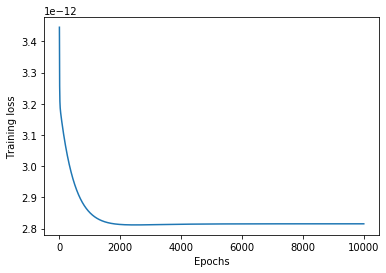

In [6]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [7]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]):
    x_test[:,i] = x_test1[:,i] - m[i]*np.ones(x_test1[:,i].shape)
    x_test[:,i] = x_test[:,i]/v[i]

In [8]:
# Predicting
y_hat = x_test@w
# Denormalising prediction
y_hat = y_hat*v1
y_hat = y_hat+m1

In [9]:
loss_te = np.mean((y_test-y_hat)**2)
print("Testing MSE = ",loss_te)

Testing MSE =  62.3915375780172
